# **Prédire le type de cancer à partir des facteurs de risque**

In [1]:
import pandas as pd

**Nettoyage des données**

In [2]:
df=pd.read_csv("/content/cancer-risk-factors.csv")
df.head()

,Patient_ID,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,...,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level
0,LU0000,Breast,68,0,7,2,8,0,5,3,...,4,6,3,1,0,0,0.398696,28.0,5,Medium
1,LU0001,Prostate,74,1,8,9,8,0,0,3,...,1,3,3,0,0,5,0.424299,25.4,9,Medium
2,LU0002,Skin,55,1,7,10,7,0,3,3,...,1,8,10,0,0,6,0.605082,28.6,2,Medium
3,LU0003,Colon,61,0,6,2,2,0,6,2,...,6,4,8,0,0,8,0.318449,32.1,7,Low
4,LU0004,Lung,67,1,10,7,4,0,6,3,...,9,10,9,0,0,5,0.524358,25.1,2,Medium


In [3]:
#Suppression des colonnes inutiles
df=df.drop(columns=["Patient_ID","Overall_Risk_Score","Risk_Level"])
df.head()

,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,Fruit_Veg_Intake,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,BMI,Physical_Activity_Level
0,Breast,68,0,7,2,8,0,5,3,7,4,6,3,1,0,0,28.0,5
1,Prostate,74,1,8,9,8,0,0,3,7,1,3,3,0,0,5,25.4,9
2,Skin,55,1,7,10,7,0,3,3,4,1,8,10,0,0,6,28.6,2
3,Colon,61,0,6,2,2,0,6,2,4,6,4,8,0,0,8,32.1,7
4,Lung,67,1,10,7,4,0,6,3,10,9,10,9,0,0,5,25.1,2


In [4]:
#Vérification des valeurs manquantes
print(df.isna().sum())

Cancer_Type                0
Age                        0
Gender                     0
Smoking                    0
Alcohol_Use                0
Obesity                    0
Family_History             0
Diet_Red_Meat              0
Diet_Salted_Processed      0
Fruit_Veg_Intake           0
Physical_Activity          0
Air_Pollution              0
Occupational_Hazards       0
BRCA_Mutation              0
H_Pylori_Infection         0
Calcium_Intake             0
BMI                        0
Physical_Activity_Level    0
dtype: int64


In [5]:
#Suppression des lignes incomplètes
df=df.dropna()

In [6]:
#Vérification des doublons
print("Doublons : ",df.duplicated().sum())

Doublons :  0


**Analyse exploratoire des données**

<Axes: title={'center': 'Nombre de cas par types de cancer'}, xlabel='Cancer_Type'>

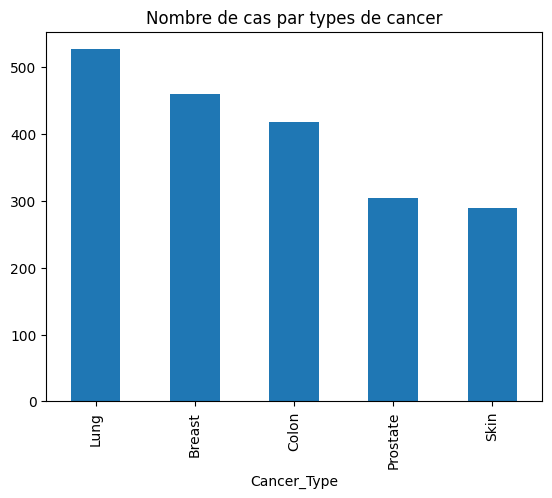

In [7]:
#Répartition des types de cancer
df["Cancer_Type"].value_counts().plot(kind="bar", title="Nombre de cas par types de cancer")

In [8]:
#Comparaison des moyennes de certains facteurs selon le cancer
df.groupby("Cancer_Type")["Smoking"].mean()

,Smoking
Cancer_Type,
Breast,3.756522
Colon,3.971292
Lung,8.848197
Prostate,3.849180
Skin,3.755172


<Axes: xlabel='Cancer_Type', ylabel='Age'>

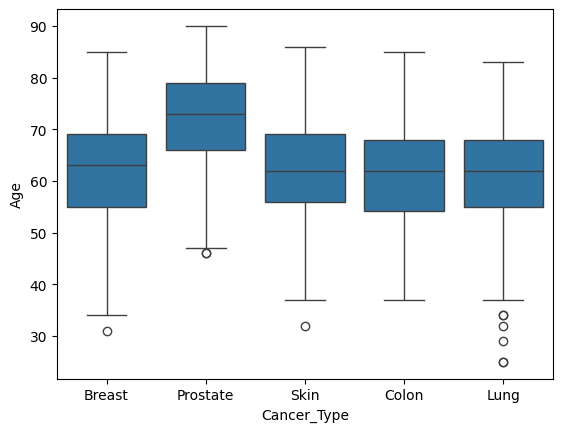

In [9]:
#Relation entre age et type de cancer
import seaborn as sns
sns.boxplot(x="Cancer_Type", y="Age",data=df)

Interprétation spécifique

***Prostate :***

Médiane la plus élevée (~70–75 ans).

Distribution concentrée sur les âges plus élevés.

Indique que ce type de cancer touche principalement les personnes âgées.

***Breast (sein) :***

Médiane autour de 60–65 ans.

Quelques cas plus jeunes (~30 ans) → présence d’outliers.

Cancer du sein touche une population globalement un peu plus jeune que le cancer de la prostate.

***Skin, Colon et Lung :***

Médianes similaires (~60–65 ans).

Distributions assez larges, indiquant que ces cancers peuvent apparaître à des âges variés.

Le cancer du poumon montre plusieurs outliers à des âges plus jeunes.

💡 ***Conclusion***

Le type de cancer semble lié à l’âge :

Prostate → majoritairement chez les plus âgés.

Breast → touche une population adulte d’âge moyen à avancé.

Skin, Colon, Lung → répartis sur un éventail d’âges plus large.

Les outliers montrent que certains types de cancers peuvent survenir plus tôt que la moyenne.

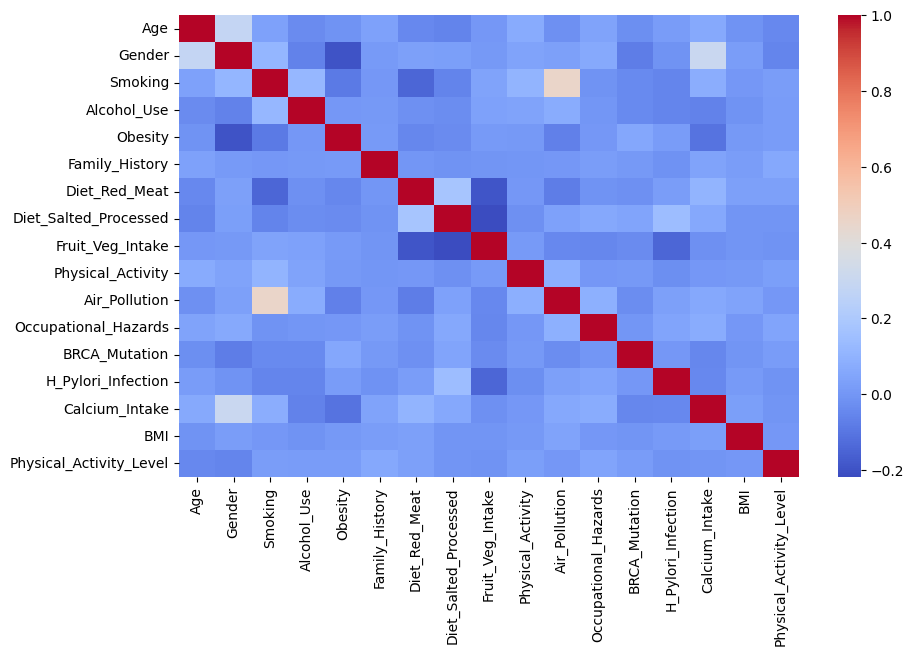

In [10]:
#Correlation
import matplotlib.pyplot as plt
corr=df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr,cmap="coolwarm",annot=False)
plt.show()

In [11]:
import pandas as pd

# Supposons que ta DataFrame s'appelle df
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Définition des bornes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Repérage des outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

print("Bornes :", lower_bound, "à", upper_bound)
print("Nombre d’outliers :", len(outliers))
print(outliers)


Bornes : 35.0 à 91.0
Nombre d’outliers : 9
    Cancer_Type  Age  Gender  Smoking  Alcohol_Use  Obesity  Family_History  \
420        Skin   32       0        1            3        8               0   
433        Lung   25       0        8            6        5               0   
454        Lung   29       0        8            6        7               0   
468        Lung   32       0        8            2        0               0   
495      Breast   31       0        1            9       10               0   
585        Lung   34       0        6            8        5               0   
593      Breast   34       0        5            1       10               1   
621        Lung   25       0        7           10        6               0   
698        Lung   34       0        8            0        2               0   

     Diet_Red_Meat  Diet_Salted_Processed  Fruit_Veg_Intake  \
420              5                      1                10   
433              3                      

**Préparation du modèle**

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Encoder la cible
encoder = LabelEncoder()
df["Cancer_Type"] = encoder.fit_transform(df["Cancer_Type"])

#Séparer X et y
X = df.drop(columns=["Cancer_Type"])
y = df["Cancer_Type"]

#dentifier les variables numériques continues
numeric_cols = ["Age", "BMI", "Calcium_Intake", "Fruit_Veg_Intake", "Physical_Activity_Level"]

#Normaliser ces colonnes uniquement
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

#Vérification
print("Colonnes normalisées :", numeric_cols)
print(X.head())


Colonnes normalisées : ['Age', 'BMI', 'Calcium_Intake', 'Fruit_Veg_Intake', 'Physical_Activity_Level']
        Age  Gender  Smoking  Alcohol_Use  Obesity  Family_History  \
0  0.454288       0        7            2        8               0   
1  1.027883       1        8            9        8               0   
2 -0.788503       1        7           10        7               0   
3 -0.214907       0        6            2        2               0   
4  0.358689       1       10            7        4               0   

   Diet_Red_Meat  Diet_Salted_Processed  Fruit_Veg_Intake  Physical_Activity  \
0              5                      3          0.680726                  4   
1              0                      3          0.680726                  1   
2              3                      3         -0.304643                  1   
3              6                      2         -0.304643                  6   
4              6                      3          1.666096                  9

**Séparation des données (entraînement et test)**

In [13]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(
    X , y , test_size=0.2, random_state=42, stratify=y
)

In [14]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [15]:
from sklearn.metrics import accuracy_score, classification_report

y_pred=model.predict(X_test)
print("Taux de réussite :",accuracy_score(y_test, y_pred))
print("\nRapport_détaillé :\n", classification_report(y_test, y_pred))

Taux de réussite : 0.7825

Rapport_détaillé :
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        92
           1       0.80      0.79      0.79        84
           2       0.79      0.91      0.85       105
           3       0.75      0.75      0.75        61
           4       0.71      0.52      0.60        58

    accuracy                           0.78       400
   macro avg       0.77      0.76      0.76       400
weighted avg       0.78      0.78      0.78       400



<Figure size 800x600 with 0 Axes>

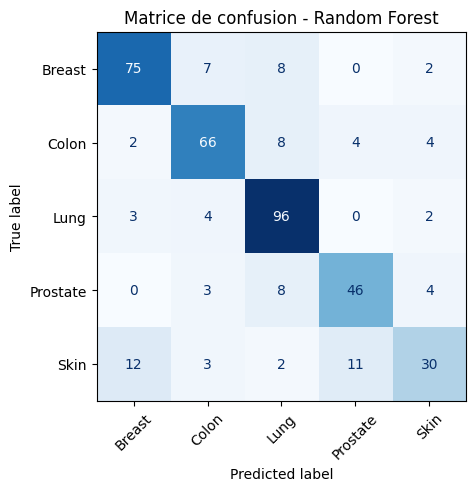

In [16]:
#matrice de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)

plt.figure(figsize=(8,6))
disp.plot(cmap="Blues", xticks_rotation=45, colorbar=False)
plt.title("Matrice de confusion - Random Forest")
plt.show()


**Interprétation des résultats**

In [17]:
import numpy as np

importances=model.feature_importances_
indices=np.argsort(importances)[::-1]

for i in indices[:10]:
  print(f"{X.columns[i]}:{importances[i]:.3f}")

Smoking:0.168
Diet_Red_Meat:0.111
Gender:0.091
Age:0.076
Obesity:0.074
Air_Pollution:0.072
Occupational_Hazards:0.066
Calcium_Intake:0.060
Diet_Salted_Processed:0.049
BMI:0.049


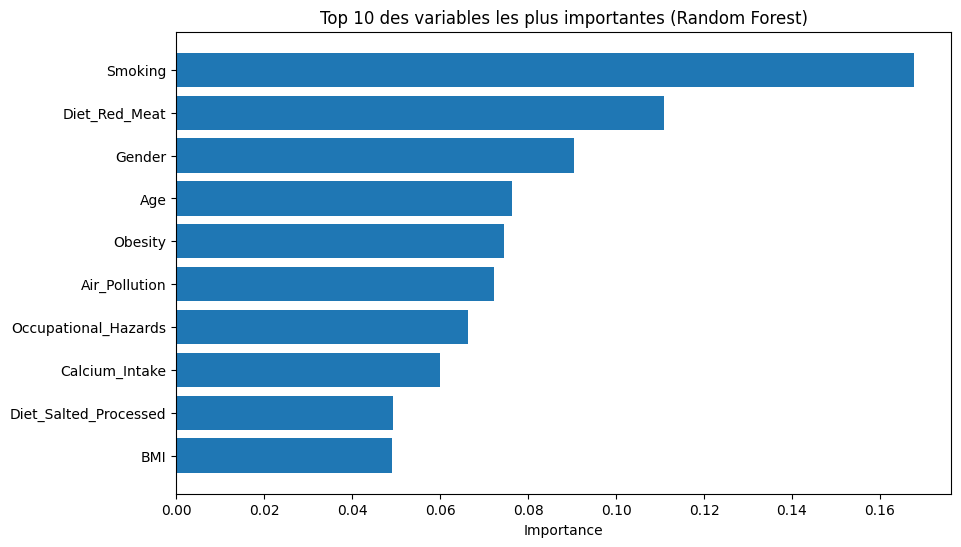

In [18]:
#Graphique des importances
plt.figure(figsize=(10,6))
plt.barh(X.columns[indices[:10]], importances[indices[:10]])
plt.xlabel("Importance")
plt.title("Top 10 des variables les plus importantes (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

In [19]:
#0->Breast
#1->Prostate
#2->Skin
#3->Colon
#4->Lung

df.groupby("Cancer_Type")[["Smoking", "Diet_Red_Meat", "Age", "Obesity", "Air_Pollution"]].mean()


,Smoking,Diet_Red_Meat,Age,Obesity,Air_Pollution
Cancer_Type,,,,,
0,3.756522,4.426087,61.765217,8.267391,4.234783
1,3.971292,8.500000,61.442584,5.160287,4.366029
2,8.848197,4.218216,61.218216,5.299810,7.607211
3,3.849180,4.465574,72.468852,5.383607,3.757377
4,3.755172,4.155172,62.193103,5.310345,5.924138


**Sein:** L’obésité est la plus élevée ici → facteur connu du cancer du sein. Fumeurs modérés, âge moyen.

**Prostate:** Très forte consommation de viande rouge → facteur de risque connu pour le cancer de la prostate.

**Peau:** Le tabagisme et la pollution ressortent élevés → exposition environnementale marquée (pollution + soleil).

**Colon:** L’âge moyen le plus élevé → cancer lié au vieillissement. Autres facteurs modérés.

**Poumon:** Pollution assez élevée + tabac modéré → cohérent avec le profil du cancer du poumon.

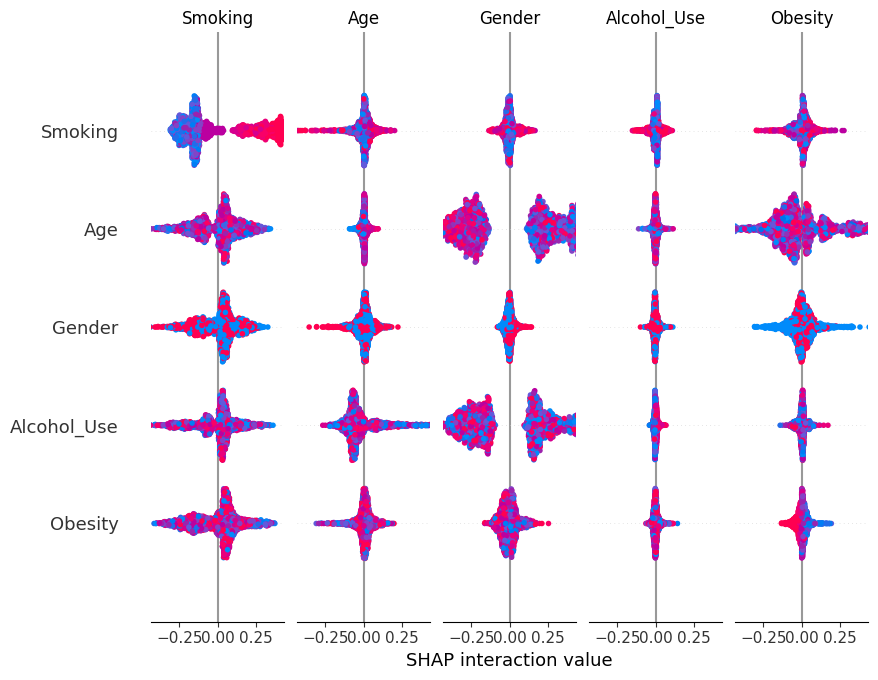

In [20]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Afficher les contributions par classe
shap.summary_plot(shap_values, X, feature_names=X.columns)
